In [1]:
#Question 1
import gzip
from collections import defaultdict

def readGz(f):
  for l in gzip.open(f):
    yield eval(l)
    
businessCount = defaultdict(int)
userinformation = defaultdict(list)
userinformation_train = defaultdict(list)
userinformation_validation = defaultdict(list)
train_set =set()
validation_set =set()
count = 0
train = open("train.txt", 'w')
validation =open("validation.txt", 'w')
for l in readGz("train.json.gz"):
    user,business = l['reviewerID'],l['itemID']
    userinformation[user].append(business)
    if count < 100000:
        user,business = l['reviewerID'],l['itemID']
        userinformation_train[user].append(business)
        train_set.add(l['reviewerID'] + '-' + l['itemID'])
        count = count +1 
        train.write(user + '-' + business + ",1\n")
    else:
        user,business = l['reviewerID'],l['itemID']
        userinformation_validation[user].append(business)
        validation_set.add(l['reviewerID'] + '-' + l['itemID'])
        count = count +1 
        validation.write(user + '-' + business + ",1\n")


In [2]:
print(len(validation_set))
print(len(userinformation_validation))

100000
36402


In [3]:
import numpy as np
import random
user_sample = []
item_sample = []

for l in readGz("train.json.gz"):
    user_sample.append(l['reviewerID'])
    item_sample.append(l['itemID'])


In [4]:

random_user_sample =set()
random_item_sample =set()
for i in range(len(user_sample)):
    random_user_sample.add(user_sample[i])
    random_item_sample.add(item_sample[i])


In [5]:
random_user_sample =list(random_user_sample)  
random_item_sample =list(random_item_sample)  
random.shuffle(random_user_sample)
random.shuffle(random_item_sample)
count = 0
while count <100000 :
    pick_user = random.sample(random_user_sample,1)
    pick_item = random.sample(random_item_sample,1)
    if pick_item[0] not in userinformation_validation[pick_user[0]]:
        count += 1
        validation.write(pick_user[0] + '-' + pick_item[0] + ",0\n")
validation.close()
train.close()

In [6]:

businessCount = defaultdict(int)
totalPurchases = 0

for l in train_set:
    user,business = l.strip().split('-')
    businessCount[business] += 1
    totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()
return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalPurchases/2: 
        break


In [7]:
actul =[]
prediction =[]
accuracy = []
validation_fact = open('validation.txt').readlines()
for i in validation_fact:
    user,temporary = i.strip().split('-')
    item,fact = temporary.strip().split(',')
    actul.append(fact)
    if item in return1 :
        if int(fact) == 1 :
            accuracy.append(1)
        else :
            accuracy.append(0)
            prediction.append(1)
    else:
        if int(fact) == 0 :
            accuracy.append(1)
        else:
            accuracy.append(0)
        prediction.append(0)

In [8]:


accuracy_rate = sum(accuracy)/len(accuracy)
accuracy_rate

0.62902

In [9]:
#So the accuracy_rate is 0.630365.The prediction and actul situation can be seen from the list prediction and list


In [10]:
#Question 2   set that the ratio is x and try to use a function to find the best value.
accuracy_rate_list=[]
x =[]
for k in range(1,100):
    return2 = []
    accuracy= []
    actul =[]
    prediction =[]
    x.append(0.3+0.005*k)
    return2 = set()
    count = 0
    for ic, i in mostPopular:
        count += ic
        return2.add(i)
        if count > totalPurchases*x[k-1]: 
            break
    for i in validation_fact:
        user,temporary = i.strip().split('-')
        item,fact = temporary.strip().split(',')
        actul.append(fact)
        if item in return2 :
            if int(fact) == 1 :
                accuracy.append(1)
            else :
                accuracy.append(0)
                prediction.append(1)
        else:
            if int(fact) == 0 :
                accuracy.append(1)
            else:
                accuracy.append(0)
            prediction.append(0)
    accuracy_rate_list.append(sum(accuracy)/len(accuracy))

    

In [11]:
import matplotlib.pyplot as plt


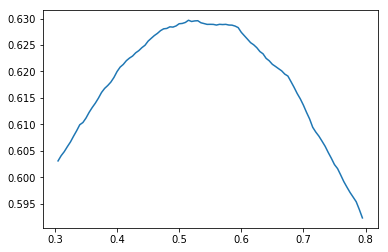

In [12]:
plt.plot(x,accuracy_rate_list)
plt.show()

In [13]:
number = accuracy_rate_list.index(max(accuracy_rate_list))
print(x[number],max(accuracy_rate_list))
#so the best split ratio is 0.515 and the best accuracy rate is 0.63087

0.515 0.62968


In [14]:
#question 3

In [15]:
cat_sample = []
for l in readGz("train.json.gz"):
    cat_sample.append(l['categories'])

IC_dict = dict(zip(item_sample,cat_sample))
UI_dict = userinformation
len(UI_dict)

39239

In [16]:
accuracy= []
actul =[]
prediction =[]
point = 0
for i in validation_fact:
    user,temporary = i.strip().split('-')
    item,fact = temporary.strip().split(',')
    actul.append(fact)
    for j in range(0,len(UI_dict[user])):
        for k in range(0,len(IC_dict[UI_dict[user][j]])):
            for m in range (0,len(IC_dict[item])):
                if IC_dict[UI_dict[user][j]][k] == IC_dict[item][m]:
                    point = point +1
    if point >0 :
        point = 0
        prediction.append(1)
    else:
        prediction.append(0)

In [17]:
count = 0
for i in range(0,len(prediction)):
    if prediction[i] == int(actul[i]):
        count = count +1
accuracy_rate = count/len(prediction)
accuracy_rate
#so accuracy is 0.59397

0.89972

In [18]:
# Question 4(old method,bad)

test = open("pairs_Purchase.txt","r").readlines()
test = test[1:]
test = [i.strip() for i in test]
prediction = []
point = 0
  
for i in test:
    user,item = i.strip().split('-')
    for j in range(0,len(UI_dict[user])):
        try:
            for k in range(0,len(IC_dict[UI_dict[user][j]])):
                for m in range (0,len(IC_dict[item])):
                    if IC_dict[UI_dict[user][j]][k] == IC_dict[item][m]:
                        point = point +1
        except:
            continue
    if point >0 :
        point = 0
        prediction.append(1)
    else:
        prediction.append(0)
#Kaggle name Troy Peng 

In [19]:
#New method to solve problem 3 and problem 4
dict2 = {}
list2 =set()
for item in IC_dict:
    for i in range(0,len(IC_dict[item])):
        for k in range (0,len(IC_dict[item][i])):
            if len(IC_dict[item][i][k]) > 0:
                    dict2[IC_dict[item][i][k]] = 0
for item in IC_dict:
    for i in range(0,len(IC_dict[item])):
        for k in range (0,len(IC_dict[item][i])):
            if len(IC_dict[item][i][k]) > 0:
                    dict2[IC_dict[item][i][k]] += 1            
    


In [20]:
dict4 = sorted(dict2.items(),key = lambda x:x[1],reverse = True)
list_high = []
list_medium = []
list_low = []
for i in range(20):
    list_high.append(dict4[i][0])
for i in range(20,50):
    list_medium.append(dict4[i][0])
for i in range(50,len(dict4)):
    list_low.append(dict4[i][0])

In [21]:
dict3 ={}
for i in dict2 :
    if dict2[i] > 100 :
        dict3[i] = dict2[i]


In [22]:
dict1 = {}
list1 =set()
for item in IC_dict:
    for i in range(0,len(IC_dict[item])):
        for k in range (0,len(IC_dict[item][i])):
            if len(IC_dict[item][i][k]) > 1:
                    list1.add(IC_dict[item][i][k]) 
    dict1[item] = list1
    list1 =set()

In [ ]:
count = 0
accuracy= []
actul =[]
prediction =[]
for i in validation_fact:
    user,temporary = i.strip().split('-')
    item,fact = temporary.strip().split(',')
    actul.append(fact)
    for j in range(0,len(UI_dict[user])):
        try:
            for k in range(0,len(IC_dict[UI_dict[user][j]])):
                a = dict1[UI_dict[user][j]]
                b = dict1[item]
                cob = a&b
                for d in range(len(cob)):
                    if cob[d] in list_high:
                        count += 0.25
                    if cob[d] in list_medium:
                        count += 0.5
                    if cob[d] in list_low:
                        count += 1
                    c
                print(count)
        except:
            continue
    if count >3  :
        count = 0
        prediction.append(1)
    else:
        prediction.append(0)
count = 0
for i in range(0,len(prediction)):
    if prediction[i] == int(actul[i]):
        count = count +1
accuracy_rate = count/len(prediction)
accuracy_rate
# Question 3(new method,better accuracy,0.63532)

In [62]:
# Question 4(new method,better accuracy in test set,kaggle name Troy Peng accuracy : 0.63928
prediction =[]
for i in test:
    user,item = i.strip().split('-')
    for j in range(0,len(UI_dict[user])):
        try:
            for k in range(0,len(IC_dict[UI_dict[user][j]])):
                a = dict1[UI_dict[user][j]]
                b = dict1[item]
                cob = a&b
                if len(cob)>= 2:
                    count = 1 + count
                    cob = []
                else :
                    cob =[]
        except:
            continue
    if count >0 :
        count = 0
        prediction.append(1)
    else:
        prediction.append(0)

In [63]:
import csv

with open('prediction_new.csv', 'w') as csv_file:
    csv_write = csv.writer(csv_file)
    for a in prediction:
        csv_write.writerow(str(a))



In [ ]:
if 'Novelty' != IC_dict[item][i][k] and 'Clothing' != IC_dict[item][i][k] and 'Shoe' != IC_dict[item][i][k] and 'XOXO' != IC_dict[item][i][k] and 'Shoes' !=IC_dict[item][i][k] :
                    list1.add(IC_dict[item][i][k])
    dict1[item] = list1
    list1 =set()